# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, size=10,window=3)
print(model)


Word2Vec(vocab=15, size=10, alpha=0.025)


In [3]:
words = list(model.wv.vocab)
print(words)



['this', 'is', 'a', 'first', 'example', 'of', 'text', 'the', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [4]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[ 0.03893511  0.03197138 -0.01619835  0.01126943 -0.02582291  0.01628728
 -0.04331387 -0.03876336  0.02839309 -0.00530177]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, size=10, alpha=0.025)


In [6]:
X = model.wv[new_model.wv.vocab]

In [7]:
X.shape

(15, 10)

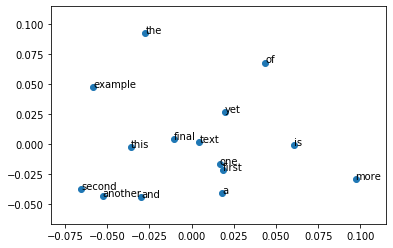

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [9]:
import gensim.downloader as api

In [10]:
corpus = api.load('text8')

In [13]:
type(corpus)


text8.Dataset

In [14]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [19]:
model8.wv['tree']

array([ 1.0845585 , -1.447499  , -0.67081517, -0.3539622 ,  0.9761783 ,
       -1.2893949 ,  1.7209607 , -1.4565487 ,  0.83913374, -0.5786138 ,
       -0.02448835, -2.442371  , -1.6645855 , -0.5277417 , -1.9883779 ,
        1.2182001 ,  0.13377741, -0.34963936,  2.030906  ,  0.2941971 ,
        1.8860514 , -0.5623651 , -1.4712397 , -0.23062025,  1.9806762 ,
       -0.8504024 ,  0.5986996 , -0.09256012, -0.49866462, -0.3489233 ,
       -2.032696  , -1.4384663 , -0.8996112 ,  0.01274424,  0.7587588 ,
       -0.21316233,  0.8946796 ,  0.03552598,  2.608429  ,  1.6139832 ,
       -0.15649626,  0.6728748 , -0.35061803,  0.7502999 ,  1.3602985 ,
        1.670218  , -0.21595243, -1.7631813 ,  0.9763704 , -1.4896239 ,
        0.13347018, -0.54444814, -1.4467409 ,  0.6638655 , -0.3587266 ,
       -0.55440396, -0.7648184 , -0.95947486,  0.8944179 ,  0.3587395 ,
        3.6684177 , -2.8658652 ,  1.5418124 , -0.39896125,  0.01623665,
       -0.25977004, -0.885386  , -0.47028556,  0.56481004,  0.02

In [20]:
print(model8.wv.most_similar('tree'))

[('leaf', 0.704186201095581), ('trees', 0.6996622085571289), ('bark', 0.6774426102638245), ('flower', 0.6746761202812195), ('bird', 0.6312825679779053), ('fruit', 0.6233150362968445), ('avl', 0.6025505661964417), ('sap', 0.5964060425758362), ('bee', 0.5929111838340759), ('trunk', 0.5810490846633911)]


In [21]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [37]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6892725229263306), ('isabella', 0.6183150410652161), ('princess', 0.6156754493713379)]


In [26]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('chevrolet', 0.6982287168502808), ('mclaren', 0.6782832145690918), ('scuderia', 0.6604217290878296)]


In [27]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('toulouse', 0.7441704273223877), ('bologna', 0.7296442985534668), ('bruges', 0.715134859085083)]


In [28]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.6455010771751404), ('mariah', 0.6153436899185181), ('britney', 0.6044227480888367)]


In [29]:
model8.wv.most_similar(['apple','orange'])

[('jaguar', 0.6331784725189209),
 ('lotus', 0.6288188099861145),
 ('logo', 0.615939736366272),
 ('iie', 0.6154823303222656),
 ('mcintosh', 0.6106723546981812),
 ('iic', 0.5993833541870117),
 ('palm', 0.5969873070716858),
 ('lemon', 0.5911547541618347),
 ('nintendo', 0.5851931571960449),
 ('mint', 0.5839861035346985)]

##  Loading pre-trained models

In [30]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [31]:
print(model.most_similar('tree'))

[('trees', 0.8293122053146362), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917217969894409), ('willow_tree', 0.6845874190330505), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498268127441), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547873020172119)]


In [32]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723936080932617), ('royalists', 0.45945388078689575)]


In [33]:
print(model.most_similar(positive=['italy', 'england'], negative=['beatles'], topn=3))


[('juve', 0.6002182960510254), ('spain', 0.5989649295806885), ('lazio', 0.5795004963874817)]


## Glove

In [34]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'glove.42B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(1917494, 300)

In [35]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7833545804023743)]


In [36]:
print(model.most_similar('tree'))

[('trees', 0.8341457843780518), ('branches', 0.6109410524368286), ('leaf', 0.6104052066802979), ('pine', 0.6100702285766602), ('forest', 0.5894954204559326), ('garden', 0.5828164219856262), ('vine', 0.5765968561172485), ('branch', 0.5740604400634766), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]
